In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import numpy as np

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듬.
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results

# 훈련 데이터를 벡터로 변환한다.
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환한다.
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환한다.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 과대적합

### 네트워크 크기 축소

과대적합을 막는 가장 단순한 방법은 모델의 크기, 즉 모델에 있는 학습 파라미터의 수를 줄이는 것이다.

원래의 네트워크는 다음과 같다.

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

2022-06-12 14:59:04.349699: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-12 14:59:05.579165: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21332 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:06:00.0, compute capability: 7.5


더 작은 네트워크로 바꿔보자.

In [8]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

원본 네트워크와 축소된 네트워크의 검증 손실을 비교해 보자.

In [10]:
original_hist = original_model.fit(x_train, y_train, epochs=20,
                                  batch_size=512, validation_data=(x_test, y_test))

2022-06-12 15:00:46.658778: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
49/49 [==============================] - 4s 60ms/step - loss: 0.4475 - acc: 0.8236 - val_loss: 0.3585 - val_acc: 0.8589
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2586 - acc: 0.9083 - val_loss: 0.2945 - val_acc: 0.8827
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1999 - acc: 0.9298 - val_loss: 0.2855 - val_acc: 0.8865
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1657 - acc: 0.9417 - val_loss: 0.3264 - val_acc: 0.8708
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1430 - acc: 0.9501 - val_loss: 0.3094 - val_acc: 0.8810
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1217 - acc: 0.9580 - val_loss: 0.3519 - val_acc: 0.8704
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1070 - acc: 0.9638 - val_loss: 0.3697 - val_acc: 0.8678
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0914 - a

In [13]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 75ms/step - loss: 0.5143 - accuracy: 0.8137 - val_loss: 0.4147 - val_accuracy: 0.8586
Epoch 2/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3283 - accuracy: 0.8969 - val_loss: 0.3235 - val_accuracy: 0.8816
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2497 - accuracy: 0.9171 - val_loss: 0.2877 - val_accuracy: 0.8886
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2076 - accuracy: 0.9302 - val_loss: 0.2806 - val_accuracy: 0.8888
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1811 - accuracy: 0.9371 - val_loss: 0.2805 - val_accuracy: 0.8875
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1601 - accuracy: 0.9451 - val_loss: 0.2987 - val_accuracy: 0.8810
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1452 - accuracy: 0.9510 - val_loss: 0.2973 - val_accuracy: 0.8834
Epoch 8/20
49

In [14]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [15]:
import matplotlib.pyplot as plt

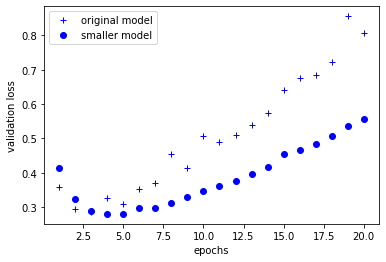

In [16]:
plt.plot(epochs, original_val_loss, 'b+', label='original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='smaller model')
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.legend()

plt.show()

그림에서 볼 수 있듯이 작은 네트워크가 기본 네트워크보다 나중에 과대적합되기 시작한다.

### 가중치 규제 추가

간단한 모델은 파라미터 값의 분포의 엔트로피가 작은 모델이라고 할 수 있다. 그러므로 과대적합을 완화하기 위한 일반적인 방법은 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것이다.  
가중치 값의 분포가 더 균일하게 되는데 이를 **가중치 규제**라고 한다.

In [17]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
l2_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

l2(0.001)는 가중치 행렬의 모든 원소를 제곱하고 0.001을 곱하여 네트워크의 전체 손실에 더해진다는 의미이다.

In [19]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 65ms/step - loss: 0.4829 - accuracy: 0.8226 - val_loss: 0.3720 - val_accuracy: 0.8849
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3072 - accuracy: 0.9100 - val_loss: 0.3430 - val_accuracy: 0.8822
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2671 - accuracy: 0.9220 - val_loss: 0.3495 - val_accuracy: 0.8788
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2497 - accuracy: 0.9292 - val_loss: 0.3434 - val_accuracy: 0.8846
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2395 - accuracy: 0.9326 - val_loss: 0.3560 - val_accuracy: 0.8783
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2327 - accuracy: 0.9354 - val_loss: 0.3680 - val_accuracy: 0.8774
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2269 - accuracy: 0.9388 - val_loss: 0.3587 - val_accuracy: 0.8801
Epoch 8/20
49

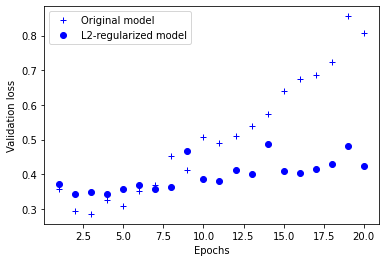

In [20]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

여기서 볼 수 있듯 두 모델이 동일한 파라미터 수를 가지고 있더라도 l2규제를 사용한 모델이 기본 보델보다 훨씬 더 과대적합에 잘 견디고 있다.

### 드롭아웃 추가

드롭아웃은 네트워크의 층에 훈련하는 동안 무작의로 층의 일부 출력 특성을 제외시킨다. 테스트단계에서는 어떤 유닛도 드롭아웃되지 않는다. 대신에 층의 출력을 드롭아웃 비율에 비례하여 줄여 준다. 훈련할 때 보다 더 많은 유닛이 활성화되기 때문이다.

In [21]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [22]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 83ms/step - loss: 0.5964 - accuracy: 0.6888 - val_loss: 0.4697 - val_accuracy: 0.8450
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4597 - accuracy: 0.8237 - val_loss: 0.3691 - val_accuracy: 0.8826
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3798 - accuracy: 0.8665 - val_loss: 0.3176 - val_accuracy: 0.8875
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3225 - accuracy: 0.8924 - val_loss: 0.2925 - val_accuracy: 0.8882
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2806 - accuracy: 0.9082 - val_loss: 0.2938 - val_accuracy: 0.8872
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2464 - accuracy: 0.9195 - val_loss: 0.2989 - val_accuracy: 0.8865
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2259 - accuracy: 0.9285 - val_loss: 0.3073 - val_accuracy: 0.8838
Epoch 8/20
49

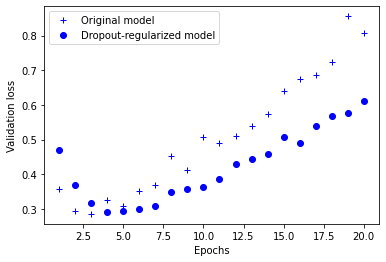

In [23]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

기본 네트워크보다 확실히 향상된것을 확인할 수 있다.